In [1]:
import pandas as pd
import glob
import os
pd.options.mode.chained_assignment = None 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
# PATHS

#Den Bosch flow
path = "../data/sewer_data/data_pump/RG8150/"
path1 = "../data_pumps/sewer_data_db/data_wwtp_flow/RG1876_flow/"
path2 = "../data_pumps/sewer_data_db/data_wwtp_flow/RG1882_flow/"


#Bokhoven level
path_8180_level = "../data/sewer_data/data_pump/RG8180_L0/"
#Bokhoven flow
path_8180_flow = "../data/sewer_data/data_pump/RG8180_Q0/"


#Haarsteeg level
path_8170_level = "../data/sewer_data/data_pump/rg8170_N99/"
#Haarsteeg flow
path_8170_flow = "../data/sewer_data/data_pump/rg8170_99/"


#Helftheuvelweg level column 003 Helftheuvelweg *.csv
path7 = "../data/sewer_data_db/data_pump_level/"
#Helftheuvelweg flow 
path8 = "../data/sewer_data_db/data_pump_flow/1210FIT301_99/"


#Engelerschans level column “004 Engelerschans” *.csv
path9 = "../data/sewer_data_db/data_pump_level/"
#Engelerschans flow + Haarsteeg + Bokhoven, therefore substract for only Engeleschans
path10 = "../data/sewer_data_db/data_pump_flow/1210FIT201_99/"


#Maaspoort level Column: “006 Maaspoort” *.csv 
path11 = "../data/sewer_data_db/data_pump_level/"
#Maasport flow + Rompert
path12= "../data/sewer_data_db/data_pump_flow/1210FIT501_99/"


#Oude Engelenseweg level Column: “002 Oude Engelenseweg” *.csv
path13 = "../data/sewer_data_db/data_pump_level/"
#Oude Engelenseweg flow
path14 = "../data/sewer_data_db/data_pump_flow/1210FIT401_94/"


#De Rompert level Column: “005 de Rompert” *.csv
path15 = "../data/sewer_data_db/data_pump_level/"
#De Rompert flow + Maasport
path16 = "../data/sewer_data_db/data_pump_flow/1210FIT501_99/"

In [3]:
#Reading and rendering (One liner example)
#Use for example this flow data and the below rain data for Haarsteeg to experiment with visualizations
#Haarsteeg

#df = pd.concat([pd.read_csv(file) for file in glob.glob(path5)], ignore_index = True)

#df.to_csv(path5+"haarsteeg_l_comb.csv")

In [4]:
path_linkinfo = "../data/sewer_model_db"
path_rain = "../data/sewer_data/rain_timeseries"

# station_names = ["Haarsteeg", "Bokhoven", "Hertogenbosch (Helftheuvelweg)", "Hertogenbosch (Rompert)"]

station_names = ["Haarsteeg", "Bokhoven"]
link = pd.read_excel(path_linkinfo+
                   "/20180717_dump riodat rioleringsdeelgebieden_DB.xlsx",skiprows=[0,1,2,3,4,5,6,7,8]
                   )

In [5]:
# #Location linkage
# path_linkinfo = "../data/waterschap-aa-en-maas_sewage_2019/sewer_model"
# path_rain = "../data/waterschap-aa-en-maas_sewage_2019/sewer_data/rain_timeseries"

# #Missing Engelerschans and RWZI Den Bosch linking streets inside the linking document(Someone revisit this please e.g @Roger)
# #Another missing thing this time in the rainfall data itself are streets in "Hertogenbosch (Oude Engelenseweg)" and in "Hertogenbosch (Maaspoort)", if you want to
# #see, plug "Hertogenbosch (Oude Engelenseweg)" or the other one in station_names to see exactly which streets are not in index
# # THIS IS SOMETHING TO REPORT AS MISSING IN OUR DELIVERABLE!!!

# station_names = ["Haarsteeg", "Bokhoven", "Hertogenbosch (Helftheuvelweg)", "Hertogenbosch (Rompert)"]
# link = pd.read_csv(path_linkinfo+
#                    "/20180717_dump riodat rioleringsdeelgebieden_matched_to_rainfall_locations.csv",
#                    header = 9)

#Street names by stations
streets = [list(link[link["Naam kern"] == name]["Naam / lokatie"]) for name in station_names]

rain = pd.concat([pd.read_csv(file, header = 2) for file in glob.glob(path_rain+"/*.*")], ignore_index = True)

#All the rain for the streets for the pump stations in order of station_names and the streets per station
#can be found in streets nested list in the same order


all_areas = rain[["Begin", "Eind"] + [i for sl in streets for i in sl]]


In [6]:
all_areas2 = pd.DataFrame()

for i in range(len(station_names)):
    all_areas2[station_names[i]] = rain[streets[i]].sum(1)

all_areas2["Begin"] =  all_areas["Begin"]
all_areas2["End"] = all_areas["Eind"]

In [7]:
# The sum of the rain at all locations
all_areas2.head()

,Haarsteeg,Bokhoven,Begin,End
0,0.0,0.0,31-05-2018 22:00:00,31-05-2018 22:05:00
1,0.0,0.0,31-05-2018 22:05:00,31-05-2018 22:10:00
2,0.0,0.0,31-05-2018 22:10:00,31-05-2018 22:15:00
3,0.0,0.0,31-05-2018 22:15:00,31-05-2018 22:20:00
4,0.0,0.0,31-05-2018 22:20:00,31-05-2018 22:25:00


# Visualizing Rainfall over time

In [8]:
#Transforming strings to datetime objects
%timeit all_areas2["Begin"]=pd.to_datetime(all_areas2["Begin"],format='%d-%m-%Y %H:%M:%S')
%timeit all_areas2["End"]=pd.to_datetime(all_areas2["End"],format='%d-%m-%Y %H:%M:%S')

2.97 ms ± 381 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.9 ms ± 910 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
min(all_areas2['Begin'])

Timestamp('2017-12-31 23:00:00')

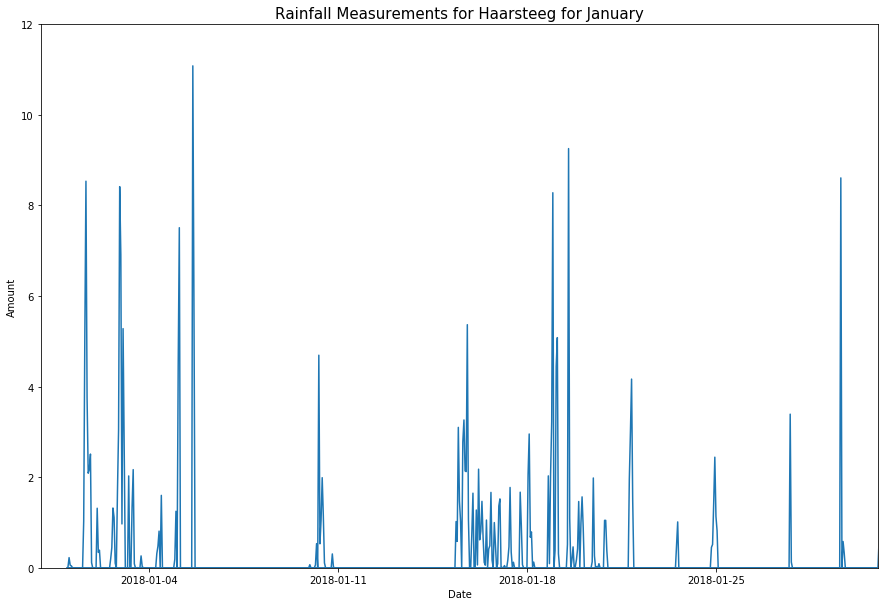

In [10]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(111)

ax1.plot(all_areas2['Begin'], all_areas2['Haarsteeg'])
ax1.set_xlim([datetime.date(2017, 12, 31), datetime.date(2018, 1, 31)])
ax1.set_ylim(0,12)

plt.title('Rainfall Measurements for Haarsteeg for January', fontsize = 15)
plt.xlabel('Date', fontsize = 10)
plt.ylabel('Amount', fontsize = 10);

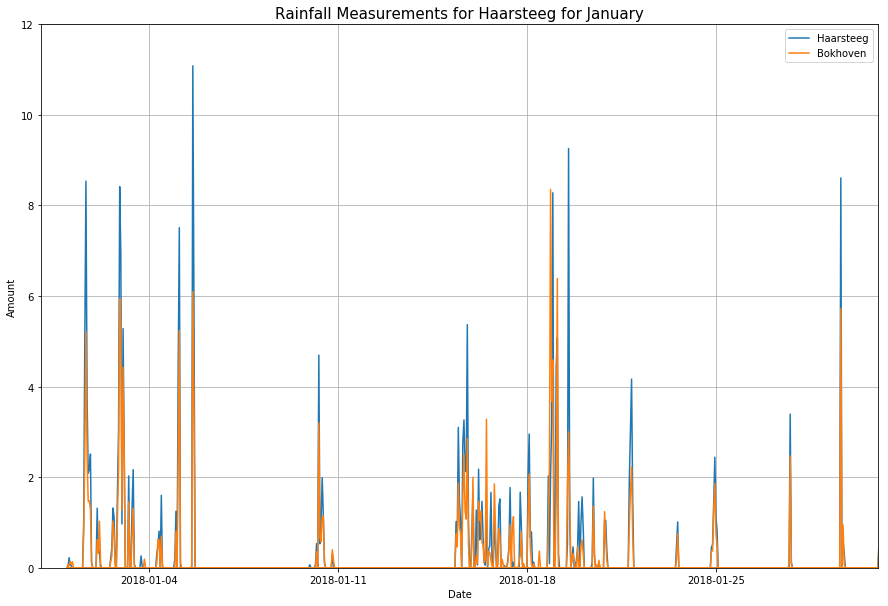

In [11]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(111)

ax1.plot(all_areas2['Begin'], all_areas2['Haarsteeg'], label = 'Haarsteeg')
ax1.plot(all_areas2['Begin'], all_areas2['Bokhoven'], label = 'Bokhoven')

ax1.set_xlim([datetime.date(2017, 12, 31), datetime.date(2018, 1, 31)])
ax1.set_ylim(0,12)

plt.title('Rainfall Measurements for Haarsteeg for January', fontsize = 15)
plt.xlabel('Date', fontsize = 10)
plt.ylabel('Amount', fontsize = 10)
plt.legend()
plt.grid();

C:\Users\maren\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


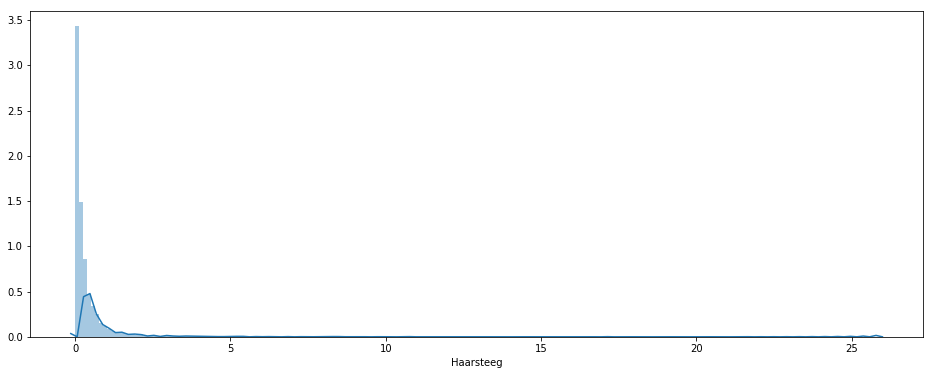

In [12]:
#Distribution of rainfall amount
plt.figure(figsize=(16, 6))
sns.distplot(all_areas2[all_areas2['Haarsteeg']!=0]['Haarsteeg'], bins = 200);

In [13]:
#Descriptive statistics
rain_Haar = all_areas2[all_areas2['Haarsteeg'] > 0.263875]
rain_Haar.describe()

,Haarsteeg,Bokhoven
count,2524.000000,2524.000000
mean,1.028796,0.629220
std,1.648399,1.101821
min,0.263900,0.000000
25%,0.365975,0.181475
50%,0.548000,0.319550
75%,0.962750,0.621300
max,25.848700,13.519400


## RG8180 && RG8170

Example: 
RG8180_flow = pd.concat([pd.read_csv(file,usecols=["datumBeginMeting","hstWaarde"],header = 0,index_col= 0,parse_dates=[1,2],infer_datetime_format=True) for file in glob.glob(path_8180_flow+"/*.*")], ignore_index = True)

### Warning: path in path list has been modified
### Useless columns in RG dataframe are removed e.g. endtime, pump name

In [14]:
#this requires you to download the pickle files from the drive and save them in the data/combined_data folder
combined_rain_pump = pd.read_pickle("../data/combined_data/"+"combined_rain_pump_1hour.pickle")
combined_rain_pump.head()

,Haarsteeg,Bokhoven,RG8180_flow,RG8180_level,RG8170_flow,RG8170_level
datumBeginMeting,,,,,,
2017-12-31 23:00:00,0.0000,0.0000,NaN,NaN,NaN,NaN
2018-01-01 00:00:00,0.0124,0.0583,1200.0,61.7,219439.2,-18.5
2018-01-01 01:00:00,0.2245,0.0448,940.0,22.6,201402.8,-50.8
2018-01-01 02:00:00,0.0563,0.1409,0.0,9.6,165302.9,-71.9
2018-01-01 03:00:00,0.0427,0.0714,280.0,3.7,143666.6,-76.4


In [15]:
#The following cells are commented out because using the pickle file works instead

# # collect CSV

# RG8180_flow = pd.concat([pd.read_csv(file,usecols=["datumBeginMeting","hstWaarde"],header = 0,parse_dates=[0],infer_datetime_format=True, encoding = "ISO-8859-1") for file in glob.glob(path_8180_flow+"/*.*")], ignore_index = True)
# RG8180_level = pd.concat([pd.read_csv(file,usecols=["datumBeginMeting","hstWaarde"],header = 0,parse_dates=[0],infer_datetime_format=True, encoding = "ISO-8859-1") for file in glob.glob(path_8180_level+"/*.*")], ignore_index = True)
# RG8170_flow = pd.concat([pd.read_csv(file,usecols=["datumBeginMeting","hstWaarde"],header = 0,parse_dates=[0],infer_datetime_format=True, encoding = "ISO-8859-1") for file in glob.glob(path_8170_flow+"/*.*")], ignore_index = True)
# RG8170_level = pd.concat([pd.read_csv(file,usecols=["datumBeginMeting","hstWaarde"],header = 0,parse_dates=[0],infer_datetime_format=True, encoding = "ISO-8859-1") for file in glob.glob(path_8170_level+"/*.*")], ignore_index = True)

# # save the csv but you can't save your love
# '''
# RG8180_flow.to_csv("../data/combined_data/"+"RG8180_flow.pickle")
# RG8180_level.to_csv("../data/combined_data/"+"RG8180_level.pickle")
# RG8170_flow.to_csv("../data/combined_data/"+"RG8170_flow.pickle")
# RG8170_level.to_csv("../data/combined_data/"+"RG8170_level.pickle")
# ''';

In [16]:
# RG8170_level.head()

In [17]:
# # convert into 5 mins interval
# RG8180_flow_5min = RG8180_flow.set_index("datumBeginMeting").sort_values(by="datumBeginMeting").rename(columns={"hstWaarde":"RG8180_flow"}).resample("5Min").sum()
# RG8180_level_5min = RG8180_level.set_index("datumBeginMeting").sort_values(by="datumBeginMeting").rename(columns={"hstWaarde":"RG8180_level"}).resample("5Min").sum()
# RG8170_flow_5min = RG8170_flow.set_index("datumBeginMeting").sort_values(by="datumBeginMeting").rename(columns={"hstWaarde":"RG8170_flow"}).resample("5Min").sum()
# RG8170_level_5min = RG8170_level.set_index("datumBeginMeting").sort_values(by="datumBeginMeting").rename(columns={"hstWaarde":"RG8170_level"}).resample("5Min").sum()

In [18]:
# RG8180_level_5min.plot()

In [19]:
# all_areas2.head()

In [20]:
# rain = all_areas2.drop("End",axis=1).rename(columns={"Begin":"datumBeginMeting"}).set_index("datumBeginMeting")

In [21]:
# rain.head()

In [22]:
# combined_rain_pump = rain.join([RG8180_flow_5min,RG8180_level_5min,RG8170_flow_5min,RG8170_level_5min])
# combined_rain_pump

# Visualizing rainfall vs pump activity

In [23]:
combined_rain_pump.head()

,Haarsteeg,Bokhoven,RG8180_flow,RG8180_level,RG8170_flow,RG8170_level
datumBeginMeting,,,,,,
2017-12-31 23:00:00,0.0000,0.0000,NaN,NaN,NaN,NaN
2018-01-01 00:00:00,0.0124,0.0583,1200.0,61.7,219439.2,-18.5
2018-01-01 01:00:00,0.2245,0.0448,940.0,22.6,201402.8,-50.8
2018-01-01 02:00:00,0.0563,0.1409,0.0,9.6,165302.9,-71.9
2018-01-01 03:00:00,0.0427,0.0714,280.0,3.7,143666.6,-76.4


In [24]:
combined_rain_pump['RG8170_level'].describe()

count    13846.000000
mean      -117.250137
std         27.935937
min       -260.500000
25%       -128.400000
50%       -125.000000
75%       -120.900000
max         54.000000
Name: RG8170_level, dtype: float64

In [25]:
combined_rain_pump.index

DatetimeIndex(['2017-12-31 23:00:00', '2018-01-01 00:00:00',
               '2018-01-01 01:00:00', '2018-01-01 02:00:00',
               '2018-01-01 03:00:00', '2018-01-01 04:00:00',
               '2018-01-01 05:00:00', '2018-01-01 06:00:00',
               '2018-01-01 07:00:00', '2018-01-01 08:00:00',
               ...
               '2019-07-31 12:00:00', '2019-07-31 13:00:00',
               '2019-07-31 14:00:00', '2019-07-31 15:00:00',
               '2019-07-31 16:00:00', '2019-07-31 17:00:00',
               '2019-07-31 18:00:00', '2019-07-31 19:00:00',
               '2019-07-31 20:00:00', '2019-07-31 21:00:00'],
              dtype='datetime64[ns]', name='datumBeginMeting', length=13847, freq='60T')

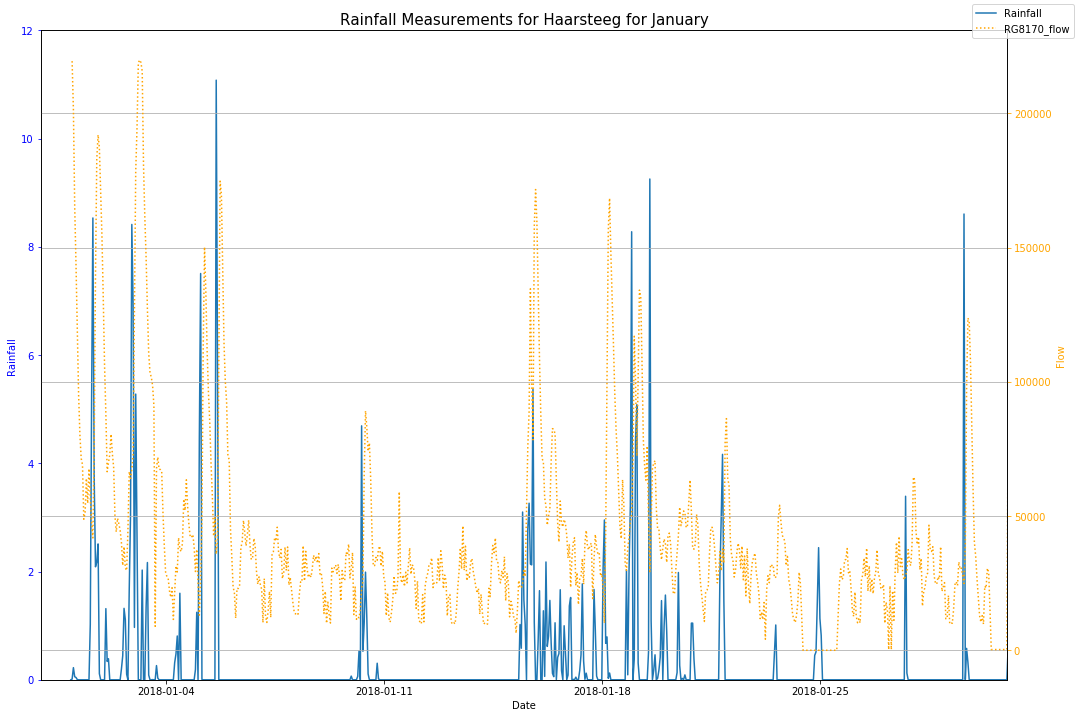

In [30]:
#Visualization for Haarsteeg and its pump
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(111)

ax1.plot(combined_rain_pump.index, combined_rain_pump['Haarsteeg'], label = 'Rainfall')
#ax1.plot(combined_rain_pump.index, combined_rain_pump['RG8170_flow'], label = 'RG8170_flow')

ax1.set_xlim([datetime.date(2017, 12, 31), datetime.date(2018, 1, 31)])
ax1.set_xlabel('Date', fontsize = 10)
ax1.set_ylabel('Rainfall', color = 'blue', fontsize = 10)
ax1.tick_params('y', colors='b')
ax1.set_ylim(0,12)


ax2 = ax1.twinx()
ax2.plot(combined_rain_pump.index, combined_rain_pump['RG8170_flow'], label = 'RG8170_flow', color = 'orange', linestyle = 'dotted')
ax2.set_ylabel('Flow', color='orange', fontsize = 10)
#ax2.set_ylim(0,20000)
ax2.tick_params('y', colors='orange')

plt.title('Rainfall Measurements for Haarsteeg for January', fontsize = 15)
fig.legend()
plt.grid()

fig.tight_layout()
#plt.show()
plt.savefig("../graphs/"+"Haar_flow_Jan.png");

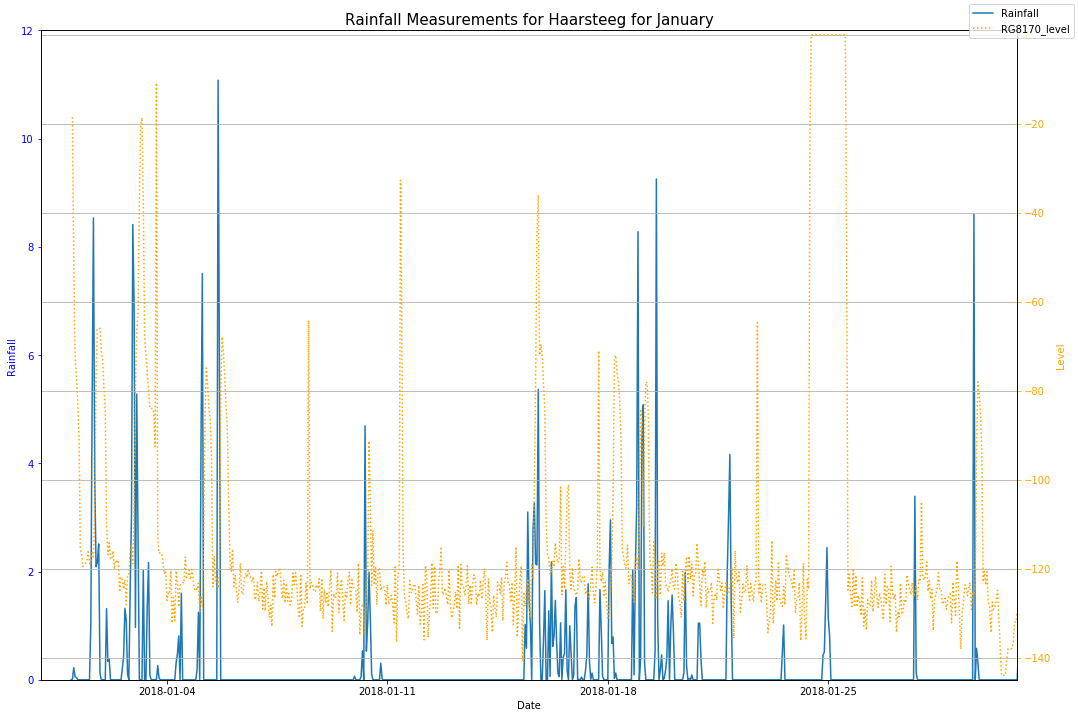

In [33]:
#Visualization for Haarsteeg and its pump
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(111)

ax1.plot(combined_rain_pump.index, combined_rain_pump['Haarsteeg'], label = 'Rainfall')
#ax1.plot(combined_rain_pump.index, combined_rain_pump['RG8170_flow'], label = 'RG8170_flow')

ax1.set_xlim([datetime.date(2017, 12, 31), datetime.date(2018, 1, 31)])
ax1.set_xlabel('Date', fontsize = 10)
ax1.set_ylabel('Rainfall', color = 'blue', fontsize = 10)
ax1.tick_params('y', colors='b')
ax1.set_ylim(0,12)


ax2 = ax1.twinx()
ax2.plot(combined_rain_pump.index, combined_rain_pump['RG8170_level'], label = 'RG8170_level', color = 'orange', linestyle = 'dotted')
ax2.set_ylabel('Level', color='orange', fontsize = 10)
ax2.set_ylim((-145, 1))
ax2.tick_params('y', colors='orange')

plt.title('Rainfall Measurements for Haarsteeg for January', fontsize = 15)
fig.legend()
plt.grid()

fig.tight_layout()
plt.savefig("../graphs/"+"Haar_level_Jan.png");

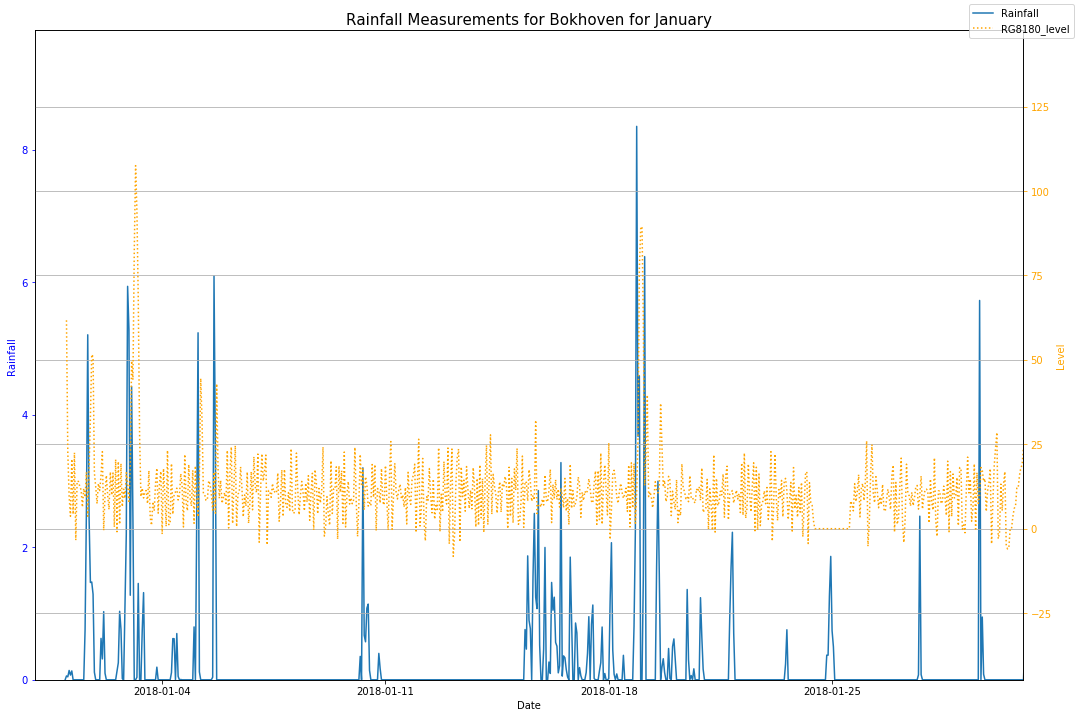

In [35]:
#Visualization for Haarsteeg and its pump
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(111)

ax1.plot(combined_rain_pump.index, combined_rain_pump['Bokhoven'], label = 'Rainfall')
#ax1.plot(combined_rain_pump.index, combined_rain_pump['RG8170_flow'], label = 'RG8170_flow')

ax1.set_xlim([datetime.date(2017, 12, 31), datetime.date(2018, 1, 31)])
ax1.set_xlabel('Date', fontsize = 10)
ax1.set_ylabel('Rainfall', color = 'blue', fontsize = 10)
ax1.tick_params('y', colors='b')
ax1.set_ylim(0,9.8)


ax2 = ax1.twinx()
ax2.plot(combined_rain_pump.index, combined_rain_pump['RG8180_level'], label = 'RG8180_level', color = 'orange', linestyle = 'dotted')
ax2.set_ylabel('Level', color='orange', fontsize = 10)
#ax2.set_ylim((-1, 9.8))
ax2.tick_params('y', colors='orange')

plt.title('Rainfall Measurements for Bokhoven for January', fontsize = 15)
fig.legend()
plt.grid()

fig.tight_layout()
plt.savefig("../graphs/"+"Bok_level_Jan.png");

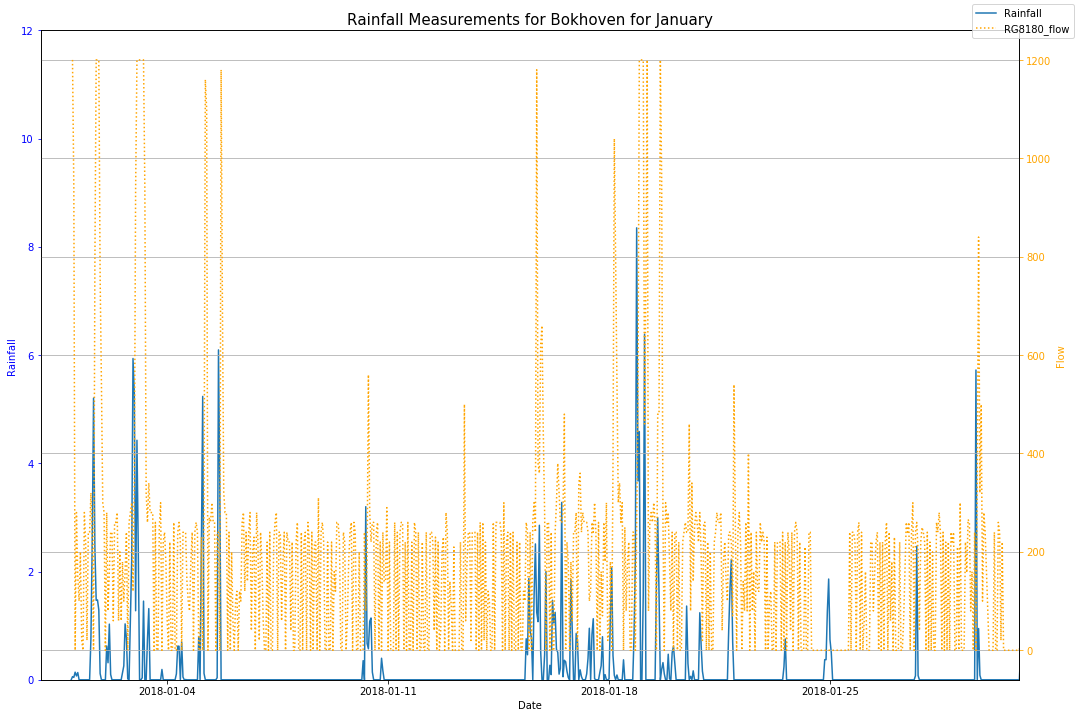

In [36]:
#Visualization for Haarsteeg and its pump
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(111)

ax1.plot(combined_rain_pump.index, combined_rain_pump['Bokhoven'], label = 'Rainfall')
#ax1.plot(combined_rain_pump.index, combined_rain_pump['RG8170_flow'], label = 'RG8170_flow')

ax1.set_xlim([datetime.date(2017, 12, 31), datetime.date(2018, 1, 31)])
ax1.set_xlabel('Date', fontsize = 10)
ax1.set_ylabel('Rainfall', color = 'blue', fontsize = 10)
ax1.tick_params('y', colors='b')
ax1.set_ylim(0,12)


ax2 = ax1.twinx()
ax2.plot(combined_rain_pump.index, combined_rain_pump['RG8180_flow'], label = 'RG8180_flow', color = 'orange', linestyle = 'dotted')
ax2.set_ylabel('Flow', color='orange', fontsize = 10)
#ax2.set_ylim(0,110)
ax2.tick_params('y', colors='orange')

plt.title('Rainfall Measurements for Bokhoven for January', fontsize = 15)
fig.legend()
plt.grid()

fig.tight_layout()
#plt.show()
plt.savefig("../graphs/"+"Bok_flow_Jan.png");